# Examen Final - supervisee

Ricardo Vallejo


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

data = pd.read_csv("resultat_mecanique.csv", sep=';')
pd.set_option('display.max_rows', None)
data

,Aptitude,Precision,rapidité,Performance
0,40,25,Elevé,1
1,45,20,Elevé,2
2,38,30,Moyenne,1
3,50,30,Faible,3
4,48,28,Faible,2
5,55,30,Elevé,3
6,53,34,Faible,3
7,55,36,Faible,4
8,58,32,Elevé,4
9,40,34,Moyenne,3


In [47]:
features = ['Aptitude', 'Precision', 'rapidité']
target = ['Performance']

In [48]:
X = data[features]
y = data[target]

In [6]:
# 1)

Text(0.5, 1.0, 'Variation de Weight vs Height')

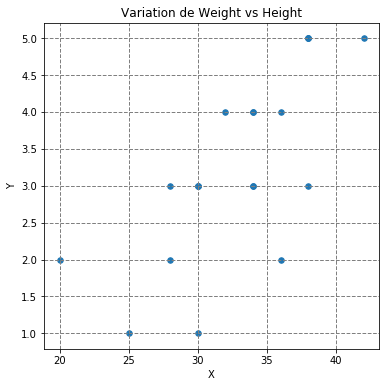

In [10]:
fig = plt.figure(figsize=(6,6))
plt.scatter( data['Precision'], data["Performance"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Performance")
plt.xlabel("Precision")
plt.title('Variation de Precision vs vs Performance')

Text(0.5, 1.0, 'Variation de Weight vs Height')

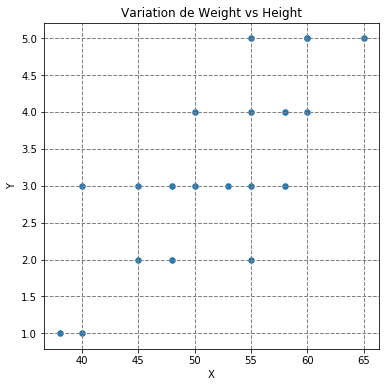

In [11]:
fig = plt.figure(figsize=(6,6))
plt.scatter( data['Aptitude'], data["Performance"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Performance")
plt.xlabel("Aptitude")
plt.title('Aptitude vs Performance')

In [ ]:
Il existe comportement lineaire dans les deux, plus evident dans la precision que dans la Aptitud.

Non plus avec les valeurs disjunctives ilya comportement lineaire.

In [12]:
data.loc[data['rapidité'] == 'Elevé', 'rapidité'] = 1
data.loc[data['rapidité'] == 'Moyenne', 'rapidité'] = 2
data.loc[data['rapidité'] == 'Faible', 'rapidité'] = 3

In [13]:
data

,Aptitude,Precision,rapidité,Performance
0,40,25,1,1
1,45,20,1,2
2,38,30,2,1
3,50,30,3,3
4,48,28,3,2
5,55,30,1,3
6,53,34,3,3
7,55,36,3,4
8,58,32,1,4
9,40,34,2,3


Text(0.5, 1.0, 'rapidité vs Performance')

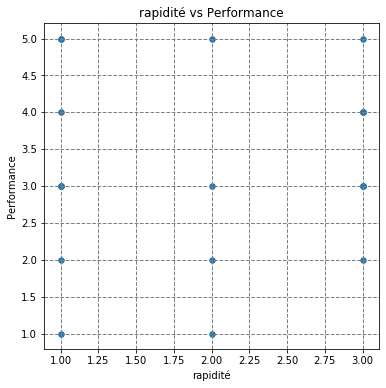

In [14]:
fig = plt.figure(figsize=(6,6))
plt.scatter( data['rapidité'], data["Performance"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Performance")
plt.xlabel("rapidité")
plt.title('rapidité vs Performance')

Pas de comportement lineaire entre rapidite et performance.

# 2)

Pour trouve l'equation je develope un modele de regression multilineaire, a cause que jai pas bcp de donnes je vais travailler sans split.

Le modele va me donnes une equation d'ordre:

y = w1 x1 + w2 x2 + w3 x3 + b

w1, w2, w2 : coefficients a trouver avec le modele.
x1,x2,x3 : descripteurs numeriques.
y : cest l'objective a predire  'performance'.

Pour measurer la qualite de notre modele on a r2 et RMSE.

A cause de la presence de variables categoriques dans le modele, cest mieux de faire une application d'algorithme de disjucntion pour representer avec 0 ou 1 la presence de chaque valeur categorique, tous avec le meme poids.


# 3)

In [62]:
X2 = pd.get_dummies(data=X, drop_first=True)
X2

,Aptitude,Precision,rapidité_Faible,rapidité_Moyenne
0,40,25,0,0
1,45,20,0,0
2,38,30,0,1
3,50,30,1,0
4,48,28,1,0
5,55,30,0,0
6,53,34,1,0
7,55,36,1,0
8,58,32,0,0
9,40,34,0,1


In [63]:
from sklearn import datasets, linear_model

features = ['Aptitude', 'Precision', 'rapidité']

X = data[features]
y = data[target]

X2 = pd.get_dummies(data=X, drop_first=True)
X2

regression = linear_model.LinearRegression()
regression.fit(X2, y)
print("Coeficients (xi): \n", regression.coef_)

print("\nIntercept: (b): ", regression.intercept_)
   

Coeficients (xi): 
 [[ 0.06575749  0.11355037  0.05353242 -0.4438606 ]]

Intercept: (b):  [-3.81422941]


In [72]:
coeff_parameter = pd.DataFrame(regression.coef_.T,X2.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Aptitude,0.065757
Precision,0.113550
rapidité_Faible,0.053532
rapidité_Moyenne,-0.443861


In [64]:
y_prediction = regression.predict(X2)

In [65]:
print('Variance score: %.5f' % regression.score(X2, y))

Variance score: 0.68625


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("mean squared error: ", np.sqrt(mean_squared_error(y, y_prediction)))
print("mean absoute error: ", mean_absolute_error(y, y_prediction))
print("R2: ", r2_score(y, y_prediction))

mean squared error:  0.6831589364198679
mean absoute error:  0.5477685228677098
R2:  0.6862479782115462


La qualite de notre model cest fiable.  68,2%

### Another methode.

In [74]:
import math

MSE = np.square(np.subtract(y,y_prediction)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6831589364198679


# 4) 

In [67]:
#features = ['Aptitude', 'rapidité_Faible', 'rapidité_Moyenne']

X4 = arr = np.array([ 54, 30, 1, 0])
y4 = regression.predict([X4])
y4


array([[3.19671878]])

Le performance cest 3.